In [1]:
import numpy as np 

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X] # ass x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.48943514],
       [3.02681006]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.48943514],
       [10.54305527]])

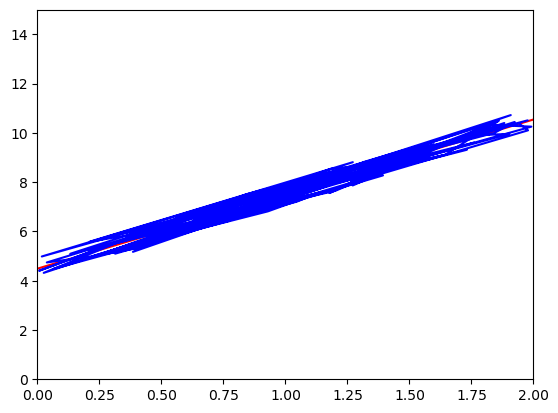

In [5]:
import matplotlib.pyplot as plt 


plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,"b")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.48943514]), array([[3.02681006]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.48943514],
       [10.54305527]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.48943514],
       [3.02681006]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.48943514],
       [3.02681006]])

In [10]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100


theta = np.random.rand(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients 

In [11]:
theta 

array([[4.48943514],
       [3.02681006]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)  # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [13]:
theta 

array([[4.47786818],
       [3.02125174]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.47885895]), array([3.03266579]))

In [16]:
m = 100
X = 6 * np.random.rand(m,1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X[0]

array([-1.7867591])

In [19]:
X_poly[0]

array([-1.7867591 ,  3.19250808])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.79477985]), array([[1.03633204, 0.60857877]]))

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 **2 + X + 2 +np.random.randn(m, 1)

In [28]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X[0]

array([0.71153066])

In [30]:
X_poly[0]

array([0.71153066, 0.50627588])

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92561589]), array([[0.9887299 , 0.08282865]]))

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m]) 
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

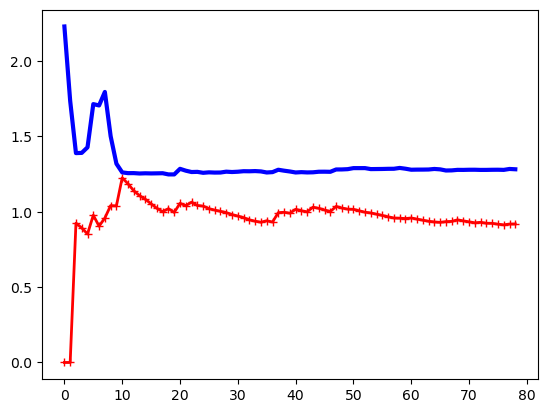

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

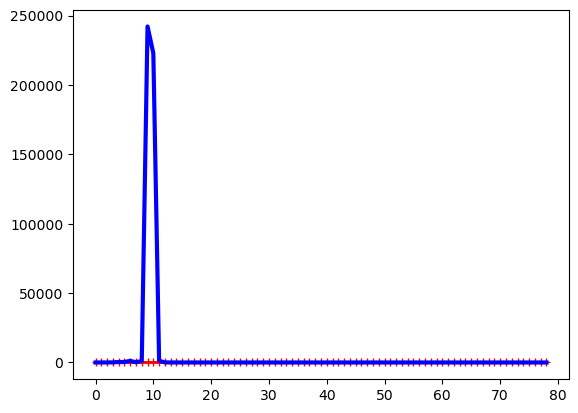

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [1]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

NameError: name 'X' is not defined

In [ ]:
ridge_reg.predict[[1.5]]

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.predict([[1.5]])

In [ ]:
# 165